NAME : PURVI PARMAR

SAP ID : 60009210029

BATCH : K3

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [ ]:
img = cv2.imread('/content/img1.jfif')

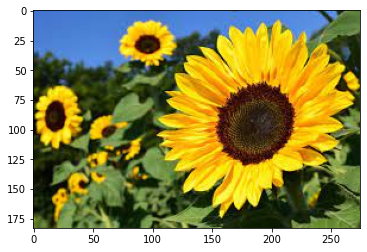

In [ ]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

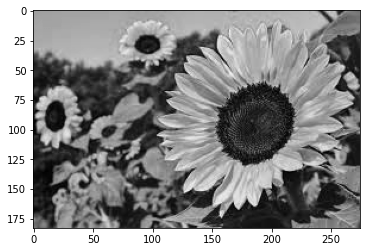

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img , cmap = "gray")

In [ ]:
#printing the shape
x,y = (img.shape)
print(x)
print(y)

183
275


In [ ]:
#adding noise
gaussian_noise=np.zeros((x , y),dtype=np.uint8)
cv2.randn(gaussian_noise,125,30)
gaussian_noise=(gaussian_noise*0.5).astype(np.uint8)

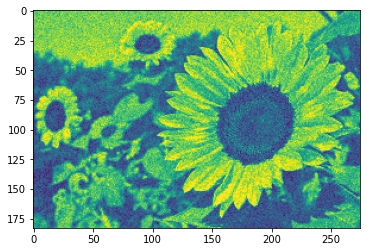

In [ ]:
gaussian_img=cv2.add(img,gaussian_noise)
plt.imshow(gaussian_img)

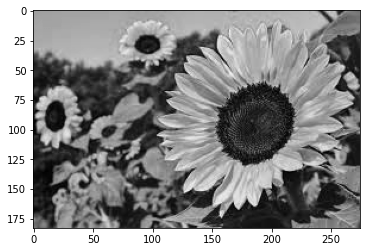

In [ ]:
plt.imshow(img,cmap='gray')

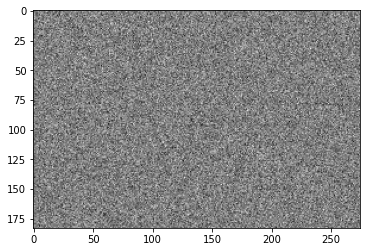

In [ ]:
plt.imshow(gaussian_noise,cmap='gray')

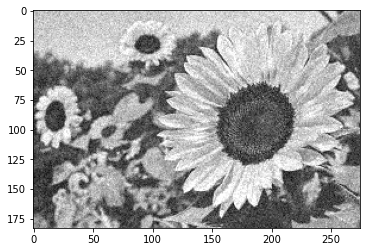

In [ ]:
plt.imshow(gaussian_img,cmap='gray')

Text(0.5, 1.0, 'Combined Image')

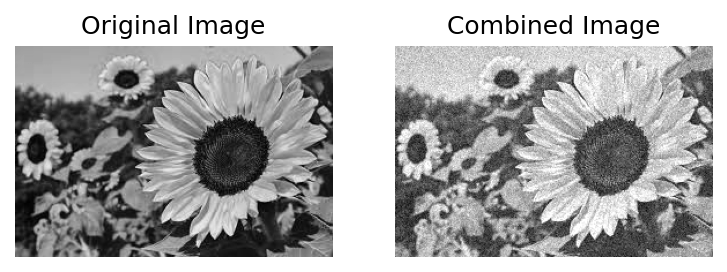

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(1,2,2)
plt.imshow(gaussian_img,cmap='gray')
plt.axis("off")
plt.title("Combined Image")

Text(0.5, 1.0, 'Combined Image')

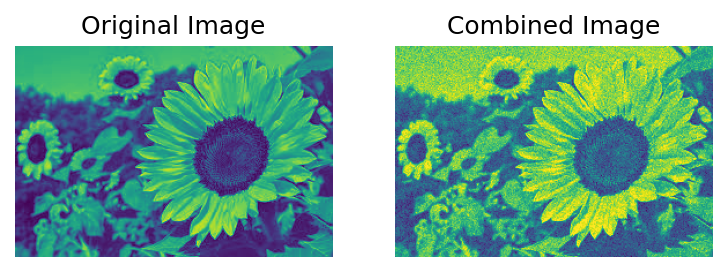

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(1,2,2)
plt.imshow(gaussian_img)
plt.axis("off")
plt.title("Combined Image")

In [ ]:
# using averaging filter
fl = np.ones([3, 3], dtype = int)
fl = fl/ 9
avg_filtered = np.zeros([x, y])

for i in range(1, x-1):
	for j in range(1, y-1):
		temp = (gaussian_img[i-1, j-1]*fl[0, 0] + gaussian_img[i-1, j]*fl[0, 1] + 
          gaussian_img[i-1, j + 1]*fl[0, 2] + gaussian_img[i, j-1]*fl[1, 0] + 
          gaussian_img[i, j]*fl[1, 1] + gaussian_img[i, j + 1]*fl[1, 2] + 
          gaussian_img[i + 1, j-1]*fl[2, 0] + gaussian_img[i + 1, j]*fl[2, 1] +
          gaussian_img[i + 1, j + 1]*fl[2, 2])
		
		avg_filtered[i, j]= temp
		
avg_filtered = avg_filtered.astype(np.uint8)

Text(0.5, 1.0, 'Denoised')

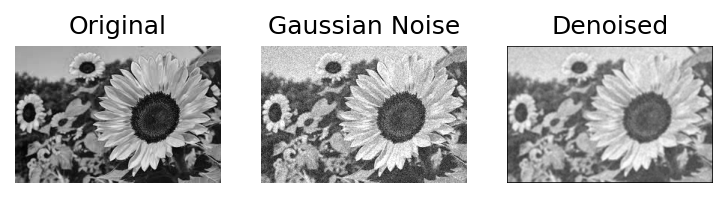

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gaussian_img,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(avg_filtered,cmap='gray')
plt.axis("off")
plt.title("Denoised")

Text(0.5, 1.0, 'Denoised')

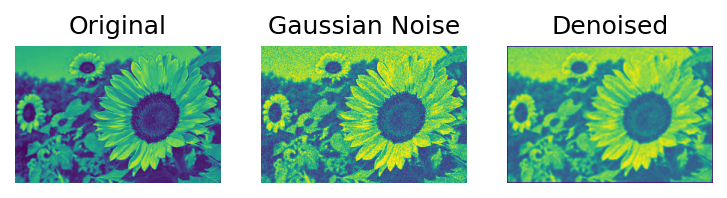

In [ ]:
fig=plt.figure(dpi = 150)
fig.add_subplot(1,3,1)
plt.imshow(img)
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gaussian_img)
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(avg_filtered)
plt.axis("off")
plt.title("Denoised")

In [ ]:
#salt and pepper noise
saltPepper_img = img.copy()

pixels = random.randint(400, 1000)
for i in range(pixels):
  y_coord=random.randint(0, x - 1)
  x_coord=random.randint(0, y - 1)
  saltPepper_img[y_coord][x_coord] = 255
  
pixels = random.randint(300 , 1000)
for i in range(pixels):
  y_coord=random.randint(0, x - 1)
  x_coord=random.randint(0, y - 1)
  saltPepper_img[y_coord][x_coord] = 0

Text(0.5, 1.0, 'Noised')

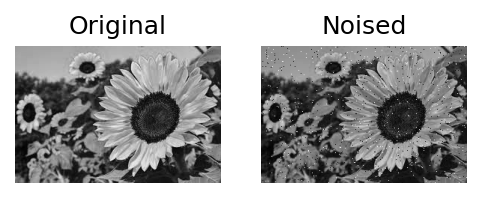

In [ ]:
fig=plt.figure(dpi = 150)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(saltPepper_img,cmap='gray')
plt.axis("off")
plt.title("Noised")

In [ ]:
#removing salt and pepper noise using median filter
medianf = np.zeros([x, y])

for i in range(1, x-1):
	for j in range(1, y-1):
		temp = [saltPepper_img[i-1, j-1],
			saltPepper_img[i-1, j],
			saltPepper_img[i-1, j + 1],
			saltPepper_img[i, j-1],
			saltPepper_img[i, j],
			saltPepper_img[i, j + 1],
			saltPepper_img[i + 1, j-1],
			saltPepper_img[i + 1, j],
			saltPepper_img[i + 1, j + 1]]
		
		temp = sorted(temp)
		medianf[i, j]= temp[4]

medianFiltered = medianf.astype(np.uint8)

Text(0.5, 1.0, 'Denoised')

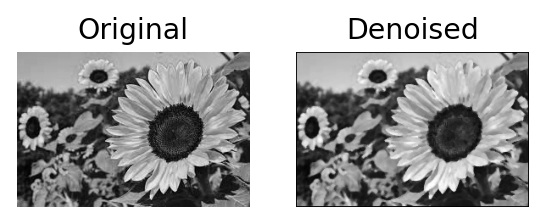

In [ ]:
fig=plt.figure(dpi = 170)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")
fig.add_subplot(1,3,2)
plt.imshow(medianFiltered,cmap='gray')
plt.axis("off")
plt.title("Denoised")

**CONCLUSION : Hence I conclude that by adding gaussian noise it increases the variation in pixel values to the extent that local edges start appearing in the image.Then we use averaging filter to remove the gaussian noise.Secondly I applied salt and pepper noise on the image,the effect of this is similar to sprinkling white and black dots salt and pepper on the image.Lastly used median filter to remove salt and pepper noise from the image.**